In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from itertools import cycle
import plotly.graph_objects as go

plt.rcParams.update({"figure.dpi": 150})

idx = pd.IndexSlice

# LOAD DATA


In [25]:
from util.load_scenarios import load_scenario_df
from util.load_evaluations import load_benchmark_df

eval_df = load_benchmark_df("../data/evaluation/benchmarking/default")
scenario_df = load_scenario_df("../data/definition/routes_devtest_sliced.xml")

# join scenario and evaluation data
df = (eval_df.join(scenario_df, on='route_index', how='inner')
      .sort_index()
      .select_dtypes('number')
      )

df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 17920 entries, (10, 'False', '0', 0) to (20, 'True', '9', 131)
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   duration_game        17920 non-null  float64
 1   duration_system      17920 non-null  float64
 2   route_length         17920 non-null  float64
 3   score_composed       17920 non-null  float64
 4   score_penalty        17920 non-null  float64
 5   score_route          17920 non-null  float64
 6   driving_score        17920 non-null  float64
 7   driving_score_error  17920 non-null  float64
 8   n_points             17920 non-null  int64  
 9   length               17920 non-null  float64
 10  dist                 17920 non-null  float64
 11  dist_len_ratio       17920 non-null  float64
 12  max_angles           17920 non-null  float64
 13  avg_angles           17920 non-null  float64
 14  n_turns              17920 non-null  int64  
dtyp

# NAIVE FEATURES

- n_turns
- avg_angles
- dist_len_ratio


In [26]:
features = ['n_turns', 'dist_len_ratio', 'max_angles']
label = 'driving_score_error'

# averaging repetitions
data = df.groupby(['fps', 'highquality', 'route_index']).mean()
# data

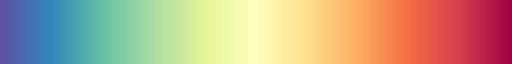

In [36]:
palette = sns.color_palette("Spectral", as_cmap=True).reversed()
palette

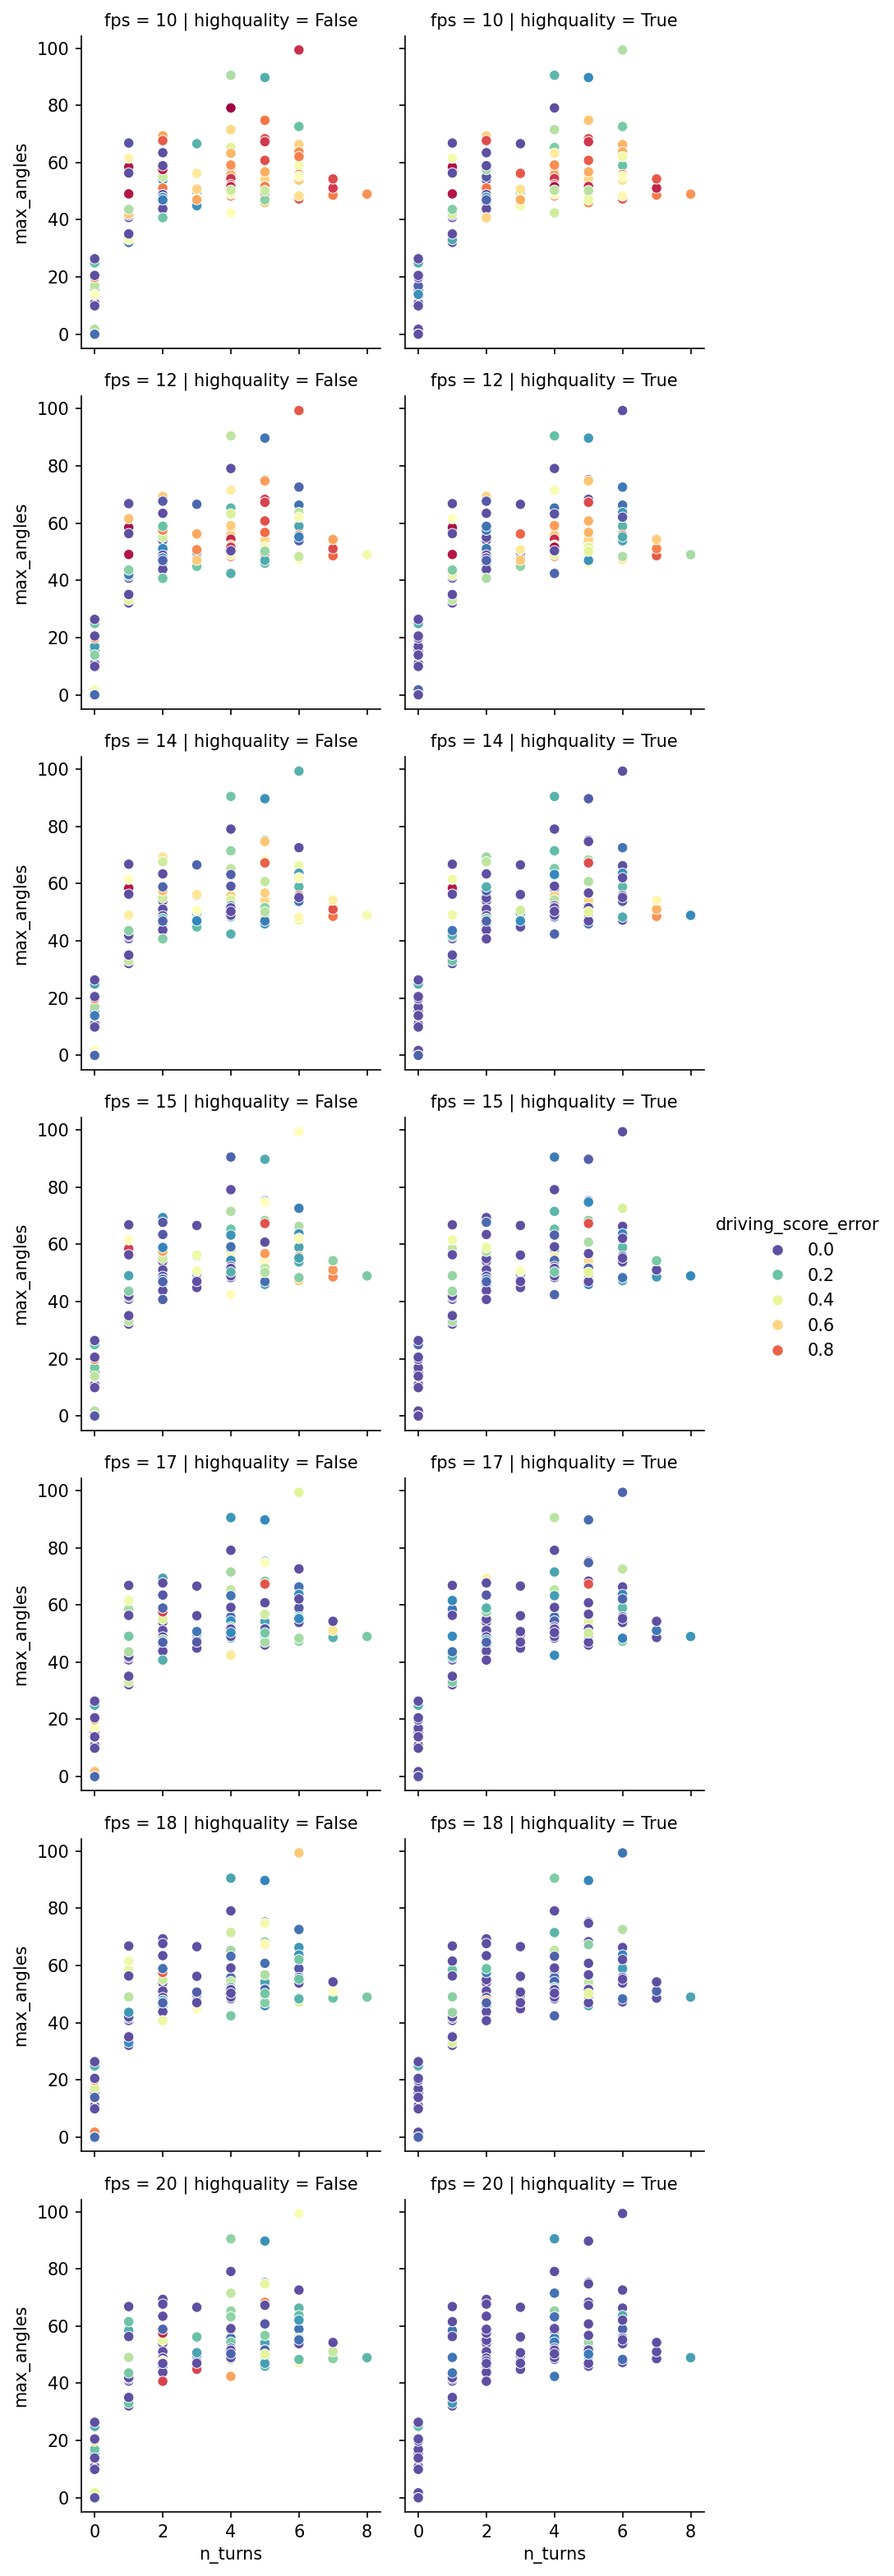

In [39]:

sns.relplot(data=data, x="n_turns", y="max_angles",
            hue=label, row="fps",  col="highquality", palette=palette, height=3,)

In [40]:
# TODO merge haolins PR